# Investigating Fandango Movie Ratings

In 2015, Walt Hickey analyzed movie ratings data and found strong evidence that Fandango's rating system was biased and dishonest. Some examples:

- The actual rating was almost always rounded **up** to the nearest star. (i.e. 4.1 rounded to 4.5, not 4)
- For about 8% of the ratings, the rounding was done t the nearest whole star. (i.e. 4.5 rounded to 5)
- One movie rating had its rating rounded from 4 to 5.

Fandango's officials replied that the rounded was due to a bug in the systems and have promised to fix it as soon as possible. Whether the bug was fixed is up in the air since the actual rating is no longer visible on the pages' HTML.

The goal of this project is to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

In [1]:
import pandas as pd

In [2]:
fandango_score_comparison = pd.read_csv('fandango_score_comparison.csv')
movie_ratings_16_17 = pd.read_csv('movie_ratings_16_17.csv')

We'll isolate the columns that we care about so the data is more readily available for later use.

In [3]:
# extract columns that we care about from Hickey's dataset
fandango_cols = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 
                'Fandango_votes', 'Fandango_Difference']

before = fandango_score_comparison[fandango_cols].copy()

In [4]:
# extracts columns that we care about from the 2016-2017 dataset
movie_cols = ['movie', 'year', 'fandango']

after = movie_ratings_16_17[movie_cols].copy()

In [5]:
before.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
after.head(5)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Since the goal of this project is to determine if there's been any change in Fandango's rating system after Hickey's analysis, the population of interest is all of Fandango's movie ratings.

We'd like to have two samples: one from *before* Hickey's analysis, and another from *after* Hickey's analysis.

Hickey's data set contains movies:
- That have at least 30 fan reviews at the time of sampling (Aug. 24, 2015)
- Had tickets sold prior to date of sampling.

These two conditions suggest that the sampling was **not** done at random. Some movies would not have had the chance to be included if there were less that 30 reviews or simply didn't have any tickets sold in 2015.

The movie rating's data set:
- Contains 214 popular movies (determined by number of votes). Threshold of votes isn't apparently in the README.md file.
- Movies are released in 2016 and 2017.

This data set is most likely also not sampled at random. The criteria of defining popular movies precludes the selection of non-popular movies.

Both data sets may have movies that are exceedingly good compared to movies in other years. It seems that both authors had different goals when gathering data. While sufficient for their research, these data sets are unlikely to be representative of the population we want.

### Changing the Goal of our Analysis

Since we've concluded the two data sets aren't what we needed, we have two options:
- we collect new data
- we change the goal of our analysis by placing limitations on it

Collecting new data may be difficult as we cannot sample data previous to Hickey's analysis. In addition, changing our goal seem to be a faster and easier alternative.

We'll shift our goal to finding if there's a change between Fandango's popular movies in 2015 and in 2016.

### Isolating the Samples We Need

Since the definition of popular is vague, we'll use Hickey's definition as standard. That is:

- A movie is popular only if it has 30 fan ratings or more on Fandango's website.

The movie ratings data doesn't include number of fan ratings, and as such, we're skeptical if this data is representative of "popular" movies.

Let's do a quick check by sampling random movies and checking the Fandango website manually. The more movies that fit the threshold, the better.

In [7]:
after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of November 17, 2019, this is the result:

| **movie** | **number of fan ratings** |
| --------- | ------------------------- |
| Mechanic: Resurrection | 25,576 |
| Warcraft | 31,430 | 
| Max Steel | 6,814 |
| Me Before You | 30,519 |
| Fantastic Beasts and Where to Find Them | 87,537 |
| Cell | 3,783 |
| Genius | 2,873 |
| Sully | 48,333 |
| A Hologram for the King | 10,193 |
| Captain America: Civil War| 176,176 |

By Hickey's definition, all the movies are popular. Let's move onto the next data set.

For Hickey's data set, we'll look at whether there are any movies with less than 30 reviews:

In [9]:
before[before['Fandango_votes'] < 30]

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference


Since we're comparing movies released in 2015 to those released in 2016, we'll need to isolate those sample data points.

In [13]:
before['Year'] = before['FILM'].str[-5:-1]

In [20]:
before_2015 = before[before['Year'] == '2015'].copy()

In [21]:
after_2016 = after[after['year'] == 2016].copy()

### Comparing Distribution Shapes for 2015 and 2016

Now that we have our data sets, we'll start analyzing. We'll start with a high-level comparison between the shapes of distribution.

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
%matplotlib inline

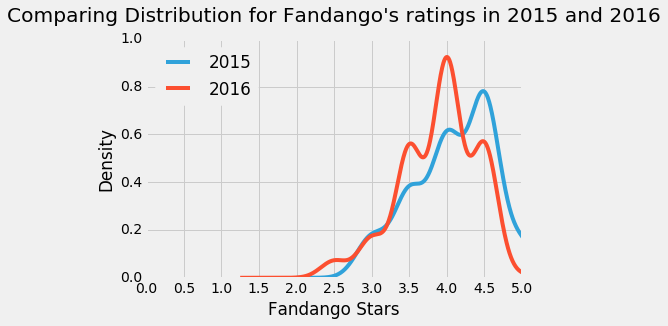

In [38]:
plt.style.use('fivethirtyeight')

before_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True)
after_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.xlabel('Fandango Stars')
plt.title('Comparing Distribution for Fandango\'s ratings in 2015 and 2016', y = 1.05)
plt.xlim(0, 5) # star rating goes from 0 to 5
plt.xticks(np.arange(0, 5.5, 0.5))
plt.show()

The distribution for 2015 and 2016 are both strong left skewed. The 2016 curve is shifted a little more left compared to the 2015 curve. This suggests that both curves have high to extremely high ratings for their movies.

Yet, the ratings in 2016 were about 0.5 star less. This might mean that Fandango's ratings for popular movies in 2016 were different from ratings in 2015.

### Comparing Relative Frequencies

Kernel density plots was a great start, now we need to look at more granular information. We'll take a look at frequency distribution tables.

In [40]:
before_2015['Fandango_Stars'].value_counts()

4.5    49
4.0    37
3.5    23
3.0    11
5.0     9
Name: Fandango_Stars, dtype: int64

In [41]:
after_2016['fandango'].value_counts()

4.0    77
4.5    47
3.5    46
3.0    14
2.5     6
5.0     1
Name: fandango, dtype: int64

Looks like there's different number of movies for each data set. Let's normalize.

In [49]:
print('2015 Frequency Distribution Table')
    
before_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015 Frequency Distribution Table


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [48]:
print('2016 Frequency Distribution Table')
after_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016 Frequency Distribution Table


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

4.5 and 5.0 ratings for 2016 are significantly lower than those in 2015. Less than 1% of the movies in 2016 had a perfect 5.0 rating. There's also a bigger range of ratings in 2016, going from 2.5 to 5.0 compared to 3.0 to 5.0 in 2015.

More movies in 2016 received 3.5 and 4.0 rating compared to movies in 2015.

### Determining the Direction of the Change

So while we determined that there is definitely a difference between the two distributions, we're not as sure about the direction of the difference.

In this section, we'll take the mean, median, and mode for each distribution and see if they can tell us the direction of the distributions.

In [53]:
before_mean = before_2015['Fandango_Stars'].mean()
before_median = before_2015['Fandango_Stars'].median()
before_mode = before_2015['Fandango_Stars'].mode()[0]

after_mean = after_2016['fandango'].mean()
after_median = after_2016['fandango'].median()
after_mode = after_2016['fandango'].mode()[0]

In [56]:
summary_table = pd.DataFrame()
summary_table['2015'] = [before_mean, before_median, before_mode]
summary_table['2016'] = [after_mean, after_median, after_mode]
summary_table.index = ['mean', 'median', 'mode']

In [57]:
summary_table

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


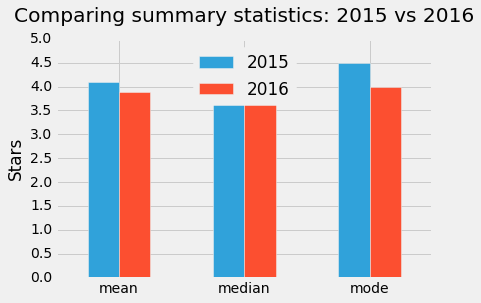

In [67]:
plt.style.use('fivethirtyeight')

summary_table.plot.bar(rot = 0)
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.05)
plt.ylabel('Stars')
plt.ylim(0, 5)
plt.yticks(np.arange(0, 5.5, 0.5))
plt.legend(loc = 'upper center')
plt.show()

The mean rating for movies released in 2016 was lower by about 0.2. The median and mode for both distributions were the same.

### Conclusion

The analysis concludes that there is indeed a difference, though slight, between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We've found that the average rating for popular movies released in 2016 were lower than popular movies released in 2015.

Perhaps Fandango did fix the rating system after Hickey's analysis was publicized.